Shape: (569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

/tmp/ipython-input-4180999061.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='diagnosis', palette='magma')


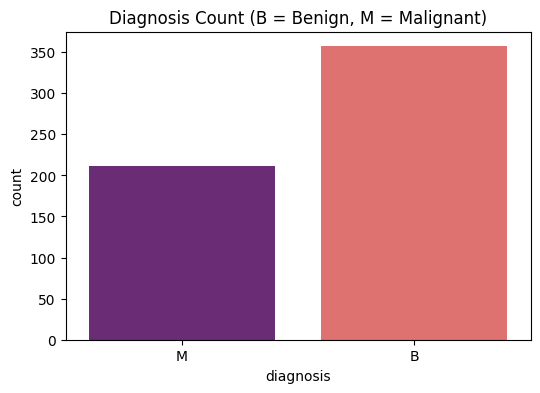

Unique counts in diagnosis:
diagnosis
B    357
M    212
Name: count, dtype: int64
Logistic Regression Accuracy: 0.9736842105263158
KNN Accuracy: 0.9473684210526315
Random Forest Accuracy: 0.9649122807017544
SVM Accuracy: 0.9736842105263158

Best model: Logistic Regression with accuracy = 0.9736842105263158


In [ ]:
# ======================================================
# 1. IMPORT LIBRARIES
# ======================================================
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# ======================================================
# 2. LOAD DATASET
# ======================================================
df = pd.read_csv('/content/data.csv')

print("Shape:", df.shape)
display(df.head())
print(df.dtypes)

# Check missing values
print("Missing values:")
print(df.isna().sum().sort_values(ascending=False))

# ======================================================
# 3. DROP UNNECESSARY COLUMN
# ======================================================
if 'Unnamed: 32' in df.columns:
    df = df.drop('Unnamed: 32', axis=1)

if 'id' in df.columns:
    df = df.drop('id', axis=1)

# ======================================================
# 4. COUNT PLOT OF DIAGNOSIS
# ======================================================
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='diagnosis', palette='magma')
plt.title("Diagnosis Count (B = Benign, M = Malignant)")
plt.show()

# ======================================================
# 5. UNIQUE COUNTS IN DIAGNOSIS
# ======================================================
print("Unique counts in diagnosis:")
print(df['diagnosis'].value_counts())

# ======================================================
# 6. MAP CATEGORICAL diagnosis → NUMERIC
# ======================================================
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})

# ======================================================
# 7. TRAIN / TEST SPLIT
# ======================================================
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# ======================================================
# 8. LOGISTIC REGRESSION
# ======================================================
log_model = LogisticRegression(max_iter=500)
log_model.fit(X_train, y_train)
log_acc = accuracy_score(y_test, log_model.predict(X_test))
print("Logistic Regression Accuracy:", log_acc)

# ======================================================
# 9. KNN
# ======================================================
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_acc = accuracy_score(y_test, knn.predict(X_test))
print("KNN Accuracy:", knn_acc)

# ======================================================
# 10. RANDOM FOREST
# ======================================================
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
rf_acc = accuracy_score(y_test, rf.predict(X_test))
print("Random Forest Accuracy:", rf_acc)

# ======================================================
# 11. SVM
# ======================================================
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)
svm_acc = accuracy_score(y_test, svm.predict(X_test))
print("SVM Accuracy:", svm_acc)

# ======================================================
# 12. BEST MODEL
# ======================================================
results = {
    "Logistic Regression": log_acc,
    "KNN": knn_acc,
    "Random Forest": rf_acc,
    "SVM": svm_acc
}

best_model = max(results, key=results.get)
print("\nBest model:", best_model, "with accuracy =", results[best_model])